In [1]:
# import libraries

import pandas as pd
import missingno as msno
import numpy as np
import recordlinkage
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from pandas.api.types import is_numeric_dtype

In [2]:
# enable to display all columns

pd.set_option('display.max_columns', None)

# Data Ingestion

In [3]:
# define new column names for renaming columns

col_names = [
    'employee_number',
    'age',
    'tenure',
    'turnover',
    'hourly_rate',
    'hours_weekly',
    'compensation_type',
    'annual_salary',
    'driving_commuter_distance',
    'job_role_area',
    'gender',
    'marital_status',
    'num_companies_previously_worked',
    'annual_professonal_dev_hrs',
    'pay_check_method',
    'text_message_optin'
]

In [4]:
# read and load source csv data file as a pandas dataframe

emp_to_df = pd.read_csv(
    '/Users/tulipz123/Documents/WGU-MDSA/D599/Task 1/source/Employee Turnover Dataset.csv', 
    sep=',',
    skiprows=1,
    names=col_names)

In [5]:
# display dataset

emp_to_df

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin
0,1,28,6,Yes,$24.37,40,Salary,50689.6,89,Research,Female,Married,3.0,7.0,Mail Check,Yes
1,2,33,2,Yes,$24.37,40,Salary,50689.6,89,Research,Female,Married,6.0,7.0,Mail Check,Yes
2,3,22,1,No,$22.52,40,Salary,46841.6,35,Information_Technology,Female,Single,1.0,8.0,Mailed Check,Yes
3,4,23,1,No,$22.52,40,Salary,46841.6,35,Information_Technology,Female,Single,3.0,NaN,Mailed Check,Yes
4,5,40,6,No,$88.77,40,Salary,284641.6,12,Sales,Prefer Not to Answer,Single,7.0,NaN,Mail Check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194,95,48,13,Yes,$85.40,40,Salary,177632.0,31,Research,Male,Single,7.0,5.0,Mail Check,NaN
10195,96,54,17,No,$85.40,40,Salary,177632.0,31,Research,Male,Single,2.0,25.0,Mail Check,Yes
10196,97,44,6,No,$71.90,40,Salary,149552.0,32,Marketing,Male,Married,6.0,NaN,Mail Check,Yes
10197,98,58,19,No,$71.90,40,Salary,149552.0,32,Marketing,Male,Married,5.0,23.0,Mail Check,Yes


# Data Profiling

#### A.  Profile data by doing the following:

#### 1.  Review the data dictionary in the attached "Employee Turnover Considerations and Dictionary" document and do the following:

##### a.  Describe the general characteristics of the initial dataset (e.g., rows, columns).

In [6]:
# check number of rows loaded

display(len(emp_to_df))

10199

In [7]:
# check number of columns loaded, data type for each variable, and non-null count for each variable

display(emp_to_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   employee_number                  10199 non-null  int64  
 1   age                              10199 non-null  int64  
 2   tenure                           10199 non-null  int64  
 3   turnover                         10199 non-null  object 
 4   hourly_rate                      10199 non-null  object 
 5   hours_weekly                     10199 non-null  int64  
 6   compensation_type                10199 non-null  object 
 7   annual_salary                    10199 non-null  float64
 8   driving_commuter_distance        10199 non-null  int64  
 9   job_role_area                    10199 non-null  object 
 10  gender                           10199 non-null  object 
 11  marital_status                   10199 non-null  object 
 12  num_companies_prev

None

In [8]:
# cast data type of 'hourly_rate' to float before further data profiling
emp_to_df['hourly_rate'] = emp_to_df['hourly_rate'].str.slice(start=1).astype('float64')

emp_to_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   employee_number                  10199 non-null  int64  
 1   age                              10199 non-null  int64  
 2   tenure                           10199 non-null  int64  
 3   turnover                         10199 non-null  object 
 4   hourly_rate                      10199 non-null  float64
 5   hours_weekly                     10199 non-null  int64  
 6   compensation_type                10199 non-null  object 
 7   annual_salary                    10199 non-null  float64
 8   driving_commuter_distance        10199 non-null  int64  
 9   job_role_area                    10199 non-null  object 
 10  gender                           10199 non-null  object 
 11  marital_status                   10199 non-null  object 
 12  num_companies_prev

In [ ]:
# cast data type of 'num_companies_previously_worked' to int is required. This will be done after inspection.

In [9]:
# get descriptive statistics

emp_to_df.describe()

,employee_number,age,tenure,hourly_rate,hours_weekly,annual_salary,driving_commuter_distance,num_companies_previously_worked,annual_professonal_dev_hrs
count,10199.000000,10199.000000,10199.000000,10199.000000,10199.0,10199.000000,10199.000000,9534.000000,8230.000000
mean,5001.960977,44.028826,8.992744,52.792995,40.0,120947.568526,45.411903,4.214810,14.938518
std,2942.709195,10.217864,5.511985,23.941940,0.0,77566.715759,54.011750,2.481994,6.087415
min,1.000000,21.000000,1.000000,17.210000,40.0,-33326.400000,-275.000000,1.000000,5.000000
25%,2451.500000,37.000000,5.000000,30.955000,40.0,63252.800000,13.000000,2.000000,10.000000
50%,5001.000000,44.000000,8.000000,48.830000,40.0,101566.400000,42.000000,4.000000,15.000000
75%,7550.500000,53.000000,13.000000,73.980000,40.0,153878.400000,71.000000,6.000000,20.000000
max,10100.000000,61.000000,20.000000,98.070000,40.0,339950.400000,950.000000,9.000000,25.000000


In [10]:
# get value count for categorical variables

for col in emp_to_df.select_dtypes(include='object').columns:
    print(f'Column Name: {col}\n{emp_to_df[col].value_counts(dropna=False)}\n')  # some are 'duplicate' values (e.g. 'Information Technology' vs 'InformationTechnology')

Column Name: turnover
No     5509
Yes    4690
Name: turnover, dtype: int64

Column Name: compensation_type
Salary    10199
Name: compensation_type, dtype: int64

Column Name: job_role_area
Research                  2025
Sales                     2007
Marketing                 1105
Manufacturing             1039
Laboratory                1021
Healthcare                1008
Human Resources            909
Information Technology     857
InformationTechnology       80
Information_Technology      56
HumanResources              51
Human_Resources             41
Name: job_role_area, dtype: int64

Column Name: gender
Female                  5812
Male                    4232
Prefer Not to Answer     155
Name: gender, dtype: int64

Column Name: marital_status
Married     3439
Single      3422
Divorced    3338
Name: marital_status, dtype: int64

Column Name: pay_check_method
Mail Check        4986
Mailed Check      2441
DirectDeposit      992
Direct_Deposit     958
Mail_Check         547
Direct De

##### b.  Indicate the data type and data subtype for each variable.

In [11]:
# ENHANCEMENT

# Per evalulator comments:
# The submission provided a view of each variable. What is missing is an appropriate data type and data subtype 
# for each variable. 

dtypes = emp_to_df.dtypes

data_subtypes = [
    'nominal', 
    'continuous',
    'continuous',
    'nominal',
    'continuous',
    'discrete',
    'nominal',
    'continuous',
    'discrete',
    'nominal',
    'nominal',
    'nominal',
    'discrete',
    'continuous',
    'nominal',
    'nominal'
]


data = {
    'dtype': dtypes,
    'data_subtype': data_subtypes
}

column_types_df = pd.DataFrame(data)

column_types_df

,dtype,data_subtype
employee_number,int64,nominal
age,int64,continuous
tenure,int64,continuous
turnover,object,nominal
hourly_rate,float64,continuous
hours_weekly,int64,discrete
compensation_type,object,nominal
annual_salary,float64,continuous
driving_commuter_distance,int64,discrete
job_role_area,object,nominal


##### c.  Provide a sample of observable values for each variable.

In [12]:
# generate a sample of 20 observable values for each variable

rand_sample_val_df = emp_to_df.sample(n=20).reset_index(drop=True)

rand_sample_val_df

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin
0,4935,38,5,No,39.24,40,Salary,81633.2,59,Research,Male,Married,6.0,NaN,Direct_Deposit,Yes
1,2469,41,6,Yes,64.84,40,Salary,134867.2,70,Research,Female,Single,9.0,18.0,Mail Check,NaN
2,3194,58,11,No,45.28,40,Salary,94282.4,67,Manufacturing,Male,Divorced,9.0,NaN,Mailed Check,Yes
3,2090,50,15,No,91.33,40,Salary,289966.4,42,Human Resources,Female,Divorced,8.0,14.0,Mailed Check,Yes
4,8185,58,6,No,51.65,40,Salary,107432.0,51,Laboratory,Male,Married,NaN,16.0,Mail Check,Yes
5,1747,50,19,No,61.23,40,Salary,127358.4,-3,Human Resources,Male,Married,2.0,25.0,Mail Check,Yes
6,4652,54,16,No,44.88,40,Salary,93350.4,66,Information Technology,Female,Married,1.0,5.0,Mail Check,Yes
7,8213,53,10,No,45.76,40,Salary,95280.8,6,Sales,Male,Divorced,8.0,23.0,Direct_Deposit,Yes
8,4510,40,6,No,27.70,40,Salary,57616.0,31,Information Technology,Female,Married,6.0,20.0,Mail Check,Yes
9,8803,38,7,No,48.06,40,Salary,99964.8,27,Research,Male,Married,2.0,10.0,Direct_Deposit,Yes


# Data Cleaning and Plan

#### B.  Inspect the dataset through data cleaning techniques for all duplicate entries, missing values, inconsistent entries, formatting errors, and outliers and do the following:

##### 1.  Explain how you inspected the dataset for each of the quality issues listed in part B.

##### 2.  List your findings for each quality issue listed in part B.

### Inspect each categorical variable for inconsistent entries using .set() / .difference()

In [13]:
# define a function to find inconsistent entries
def find_inconsistent_values(col_name, expected_values):
    # get unique values for 'job_role_area' from the dataset
    actual_values = set(emp_to_df[col_name])
    
    # find inconsistent entries (i.e. unexpected values)
    inconsistent_values = actual_values.difference(expected_values)
    
    return inconsistent_values

# find inconsistent entries for 'job_role_area'
expected_values_jra = ['Healthcare', 'Human Resources', 'Information Technology', 'Laboratory', 'Manufacturing', 'Marketing', 'Research', 'Sales']
inconsistent_values_jra = find_inconsistent_values('job_role_area', expected_values_jra)

print(f'job_role_area: {inconsistent_values_jra}')

# find inconsistent entries for 'pay_check_method'
expected_values_pcm = ['Mailed Check', 'Direct Deposit']
inconsistent_values_pcm = find_inconsistent_values('pay_check_method', expected_values_pcm)

print(f'pay_check_method: {inconsistent_values_pcm}')

job_role_area: {'Information_Technology', 'HumanResources', 'InformationTechnology', 'Human_Resources'}
pay_check_method: {'Mail_Check', 'DirectDeposit', 'Mail Check', 'MailedCheck', 'Direct_Deposit'}


#### Enhancement: Per evaluator comments, an appropriate method is missing for identifying inappropriate negative values in applicable variables.

### Inspect each numeric variable for inconsistent entries

In [14]:
# find negative values for numeric variables
for column in emp_to_df.columns:
    if is_numeric_dtype(emp_to_df[column]) and (emp_to_df[column] <= 0).any():
        print(column)
        
# since hourly_rate > 0 and hours_weekly > 0, annual_salary cannot be <= 0
# driving_commuter_distance cannot be <= 0 

annual_salary
driving_commuter_distance


In [15]:
# get 10 random samples of negative values for annual_salary
emp_to_df[emp_to_df['annual_salary'] <= 0].sample(n=10)

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin
8665,8666,49,8,No,32.59,40,Salary,-10412.8,14,Marketing,Female,Single,5.0,12.0,Mail Check,Yes
3055,3056,41,10,Yes,31.23,40,Salary,-16041.6,62,Marketing,Female,Single,6.0,18.0,Mail Check,Yes
9506,9507,38,4,No,31.12,40,Salary,-16270.4,96,Marketing,Female,Single,1.0,NaN,Mailed Check,Yes
1320,1321,36,10,Yes,32.60,40,Salary,-10392.0,87,Marketing,Male,Single,4.0,NaN,Mail Check,Yes
10154,55,44,16,No,31.30,40,Salary,-15896.0,-5,Marketing,Male,Divorced,8.0,22.0,Mail Check,Yes
3617,3618,35,4,No,30.84,40,Salary,-12852.8,4,Marketing,Male,Single,3.0,19.0,Mail Check,Yes
9631,9632,37,1,No,31.74,40,Salary,-14980.8,94,Marketing,Male,Divorced,1.0,24.0,Mailed Check,Yes
55,56,50,8,No,31.30,40,Salary,-15896.0,-5,Marketing,Male,Divorced,5.0,10.0,Mail Check,Yes
4074,4075,35,3,No,29.17,40,Salary,-33326.4,54,Marketing,Female,Married,6.0,16.0,Direct_Deposit,Yes
5804,5805,38,9,Yes,30.02,40,Salary,-14558.4,13,Marketing,Female,Married,6.0,17.0,Mail Check,Yes


In [16]:
# get 10 random samples of negative values for driving_commuter_distance
emp_to_df[emp_to_df['driving_commuter_distance'] <= 0].sample(n=10)

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin
4347,4348,43,1,No,46.25,40,Salary,96200.0,-14,Manufacturing,Male,Married,4.0,15.0,Mail Check,Yes
5166,5167,46,7,Yes,33.51,40,Salary,40580.8,-1,Laboratory,Female,Single,2.0,25.0,Mail_Check,Yes
5773,5774,37,7,Yes,88.39,40,Salary,283851.2,-8,Marketing,Female,Single,6.0,23.0,Mailed Check,NaN
2694,2695,49,13,Yes,44.10,40,Salary,91728.0,-11,Marketing,Female,Married,3.0,NaN,Mail Check,Yes
7634,7635,61,19,No,36.71,40,Salary,76356.8,-7,Marketing,Male,Married,9.0,15.0,Mail Check,Yes
7608,7609,42,6,Yes,49.27,40,Salary,102481.6,-6,Marketing,Female,Divorced,NaN,14.0,Mailed Check,Yes
1932,1933,43,8,No,84.92,40,Salary,176633.6,-1,Healthcare,Female,Divorced,2.0,10.0,Mail Check,Yes
821,822,38,7,No,57.92,40,Salary,120473.6,-125,InformationTechnology,Male,Single,4.0,12.0,Mail Check,Yes
6085,6086,21,1,Yes,22.60,40,Salary,47008.0,-4,Information Technology,Male,Married,1.0,11.0,Mail Check,Yes
600,601,41,3,Yes,76.71,40,Salary,159556.8,-6,Healthcare,Male,Married,4.0,11.0,Mail Check,Yes


### Inspect each categorical variable for formatting errors using Record Linkage

In [17]:
# define a function to categorize job_role_area and pay_check_method
# the defined category will be used to create candidate pairs
# further comparison will be implemented to ensure they are the same value

# for job_role_area, the category will be defined with the following assumptions:
# 1. value contains 'Human' belongs to 'Human Resource'
# 2. value contains 'Information' belongs to 'Information Technology'

# for pay_check_method, the category will be defined with the following assumptions:
# 1. value contains 'Mail' belongs to 'Mailed Check'
# 2. value contains 'Direct' belongs to 'Direct Deposit'

def categorize(row, col_name, categories):
    value = str(row[col_name])
    
    if categories[0].split()[0] in value:
        return categories[0]
    elif categories[1].split()[0] in value:
        return categories[1]
    else:
        return value

job_role_area_categories = ['Human Resources', 'Information Technology']
pay_check_method_categories = ['Mail Check', 'Direct Deposit']

emp_to_df['job_role_area_category'] = emp_to_df.apply(lambda row: categorize(row, 'job_role_area', job_role_area_categories), axis=1)
emp_to_df['pay_check_method_category'] = emp_to_df.apply(lambda row: categorize(row, 'pay_check_method', pay_check_method_categories), axis=1)

emp_to_df

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin,job_role_area_category,pay_check_method_category
0,1,28,6,Yes,24.37,40,Salary,50689.6,89,Research,Female,Married,3.0,7.0,Mail Check,Yes,Research,Mail Check
1,2,33,2,Yes,24.37,40,Salary,50689.6,89,Research,Female,Married,6.0,7.0,Mail Check,Yes,Research,Mail Check
2,3,22,1,No,22.52,40,Salary,46841.6,35,Information_Technology,Female,Single,1.0,8.0,Mailed Check,Yes,Information Technology,Mail Check
3,4,23,1,No,22.52,40,Salary,46841.6,35,Information_Technology,Female,Single,3.0,NaN,Mailed Check,Yes,Information Technology,Mail Check
4,5,40,6,No,88.77,40,Salary,284641.6,12,Sales,Prefer Not to Answer,Single,7.0,NaN,Mail Check,Yes,Sales,Mail Check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194,95,48,13,Yes,85.40,40,Salary,177632.0,31,Research,Male,Single,7.0,5.0,Mail Check,NaN,Research,Mail Check
10195,96,54,17,No,85.40,40,Salary,177632.0,31,Research,Male,Single,2.0,25.0,Mail Check,Yes,Research,Mail Check
10196,97,44,6,No,71.90,40,Salary,149552.0,32,Marketing,Male,Married,6.0,NaN,Mail Check,Yes,Marketing,Mail Check
10197,98,58,19,No,71.90,40,Salary,149552.0,32,Marketing,Male,Married,5.0,23.0,Mail Check,Yes,Marketing,Mail Check


##### data similarities comparison logic starts here...

In [18]:
# create a deep copy of emp_to_df
emp_to_df_copy = emp_to_df.copy()

# initialize Compare() object
job_role_comp = recordlinkage.Compare()
pay_check_comp = recordlinkage.Compare()

In [19]:
# define a function to create candidate pairs for comparison
def create_candidate_pairs(col_name):
    indexer = recordlinkage.Index()
    indexer.block(col_name)
    candidate_links = indexer.index(emp_to_df, emp_to_df_copy)
    
    return candidate_links

In [20]:
# create candidate pairs for 'job_role_area'
cand_links_job_role_area = create_candidate_pairs('job_role_area_category')

# initialize similarity measurement algorithms for 'job_role_area'
job_role_comp.string('job_role_area', 'job_role_area', threshold=0.85, label='job_role_similar')
job_role_comp.exact('job_role_area', 'job_role_area', label='job_role_exact')

features_job_role = job_role_comp.compute(cand_links_job_role_area, emp_to_df, emp_to_df_copy)

In [21]:
# get data dissimilarities for 'job_role_area'

features_job_role[features_job_role['job_role_similar'] < 1]

,,job_role_similar,job_role_exact


In [22]:
# get exact mismatches for 'job_role_area'

features_job_role[features_job_role['job_role_exact'] < 1]  

job_role_similar  job_role_exact
2     388                 1.0               0
      392                 1.0               0
      404                 1.0               0
      423                 1.0               0
      437                 1.0               0
...                       ...             ...
10131 10028               1.0               0
      10033               1.0               0
      10036               1.0               0
      10082               1.0               0
      10092               1.0               0

[413502 rows x 2 columns]

##### example of data not exact match

In [23]:
emp_to_df.loc[2:2]

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin,job_role_area_category,pay_check_method_category
2,3,22,1,No,22.52,40,Salary,46841.6,35,Information_Technology,Female,Single,1.0,8.0,Mailed Check,Yes,Information Technology,Mail Check


In [24]:
emp_to_df.loc[388:388]

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin,job_role_area_category,pay_check_method_category
388,389,43,7,Yes,34.64,40,Salary,72051.2,250,InformationTechnology,Female,Divorced,4.0,16.0,Mailed Check,Yes,Information Technology,Mail Check


In [25]:
# create candidate pairs for 'pay_check_method'
cand_links_pay_check_method = create_candidate_pairs('pay_check_method_category')

# initialize similarity measurement algorithms for 'pay_check_method'
pay_check_comp.string('pay_check_method', 'pay_check_method', threshold=0.85, label='pay_check_similar')
pay_check_comp.exact('pay_check_method', 'pay_check_method', label='pay_check_exact')

features_pay_check = pay_check_comp.compute(cand_links_pay_check_method, emp_to_df, emp_to_df_copy)

In [26]:
# get data dissimilarities for 'pay_check_method'

features_pay_check[features_pay_check['pay_check_similar'] < 1]

pay_check_similar  pay_check_exact
0     2                    0.0                0
      3                    0.0                0
      14                   0.0                0
      15                   0.0                0
      26                   0.0                0
...                        ...              ...
10198 10153                0.0                0
      10160                0.0                0
      10161                0.0                0
      10178                0.0                0
      10179                0.0                0

[27554340 rows x 2 columns]

##### example of data dissimilarities

In [27]:
emp_to_df.loc[0:0]

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin,job_role_area_category,pay_check_method_category
0,1,28,6,Yes,24.37,40,Salary,50689.6,89,Research,Female,Married,3.0,7.0,Mail Check,Yes,Research,Mail Check


In [28]:
emp_to_df.loc[15:15]

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin,job_role_area_category,pay_check_method_category
15,16,38,1,No,30.42,40,Salary,63273.6,36,Information_Technology,Female,Married,3.0,5.0,Mailed Check,Yes,Information Technology,Mail Check


In [29]:
# get data mismatches for 'pay_check_method'

features_pay_check[features_pay_check['pay_check_exact'] < 1]

pay_check_similar  pay_check_exact
0     2                    0.0                0
      3                    0.0                0
      14                   0.0                0
      15                   0.0                0
      26                   0.0                0
...                        ...              ...
10183 10143                1.0                0
      10146                1.0                0
      10147                1.0                0
      10174                1.0                0
      10175                1.0                0

[36030314 rows x 2 columns]

##### example of data mismatches

In [30]:
emp_to_df.loc[0:0]

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin,job_role_area_category,pay_check_method_category
0,1,28,6,Yes,24.37,40,Salary,50689.6,89,Research,Female,Married,3.0,7.0,Mail Check,Yes,Research,Mail Check


In [31]:
emp_to_df.loc[26:26]

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin,job_role_area_category,pay_check_method_category
26,27,32,6,No,31.02,40,Salary,64521.6,910,Research,Female,Married,1.0,18.0,Mailed Check,Yes,Research,Mail Check


### Inspect each variable for missing values

##### per emp_to_df.info()...
##### total entries = 10,199
##### below columns have less than 10,199 non-null count:
#####  num_companies_previously_worked - 9534  non-null
#####  annual_professonal_dev_hrs - 8230  non-null
#####  text_message_optin - 7933  non-null 

In [32]:
emp_to_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   employee_number                  10199 non-null  int64  
 1   age                              10199 non-null  int64  
 2   tenure                           10199 non-null  int64  
 3   turnover                         10199 non-null  object 
 4   hourly_rate                      10199 non-null  float64
 5   hours_weekly                     10199 non-null  int64  
 6   compensation_type                10199 non-null  object 
 7   annual_salary                    10199 non-null  float64
 8   driving_commuter_distance        10199 non-null  int64  
 9   job_role_area                    10199 non-null  object 
 10  gender                           10199 non-null  object 
 11  marital_status                   10199 non-null  object 
 12  num_companies_prev

In [33]:
# inspect using np.isnan() / pd.isnull()

null_columns = ['num_companies_previously_worked', 'annual_professonal_dev_hrs', 'text_message_optin']

for column in null_columns:
    is_null = np.isnan(emp_to_df[column]) if emp_to_df[column].dtype != 'object' else pd.isnull(emp_to_df[column])
    
    cnt_of_nulls = is_null[is_null == True].count()
    cnt_of_non_nulls = is_null[is_null == False].count()
    
    print(f'Column: {column}')
    print(f'Count of nulls: {cnt_of_nulls}')
    print(f'Count of non-nulls: {cnt_of_non_nulls}')
    print(f'Total count (cnt of nulls + non-nulls): {cnt_of_nulls + cnt_of_non_nulls}\n')

Column: num_companies_previously_worked
Count of nulls: 665
Count of non-nulls: 9534
Total count (cnt of nulls + non-nulls): 10199

Column: annual_professonal_dev_hrs
Count of nulls: 1969
Count of non-nulls: 8230
Total count (cnt of nulls + non-nulls): 10199

Column: text_message_optin
Count of nulls: 2266
Count of non-nulls: 7933
Total count (cnt of nulls + non-nulls): 10199



<AxesSubplot:>

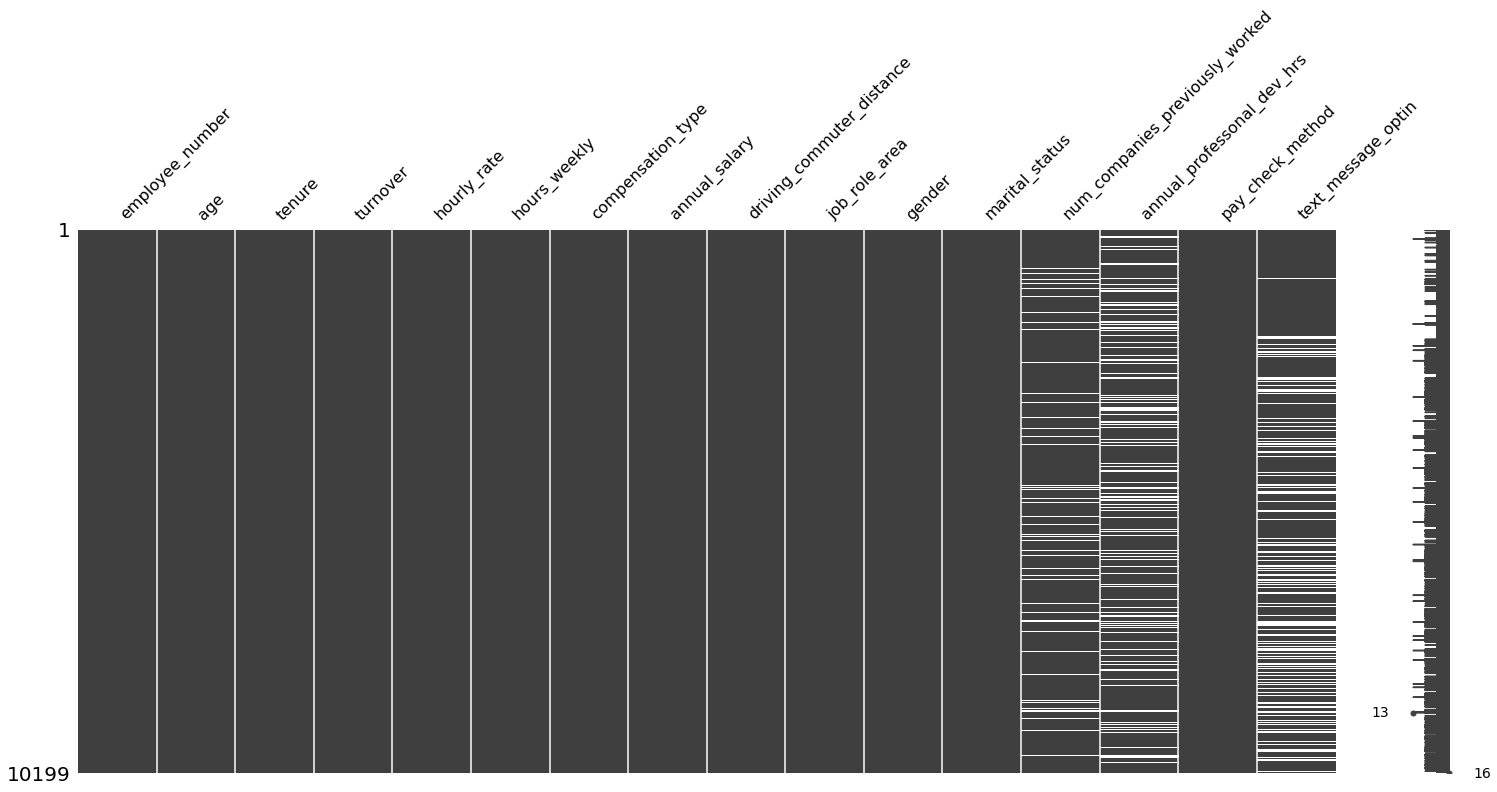

In [34]:
# visualize missing values

# revert back to the original dataframe by dropping the columns
emp_to_df.drop(labels=['job_role_area_category', 'pay_check_method_category'], inplace=True, axis=1)
# emp_to_df

msno.matrix(emp_to_df)

<AxesSubplot:>

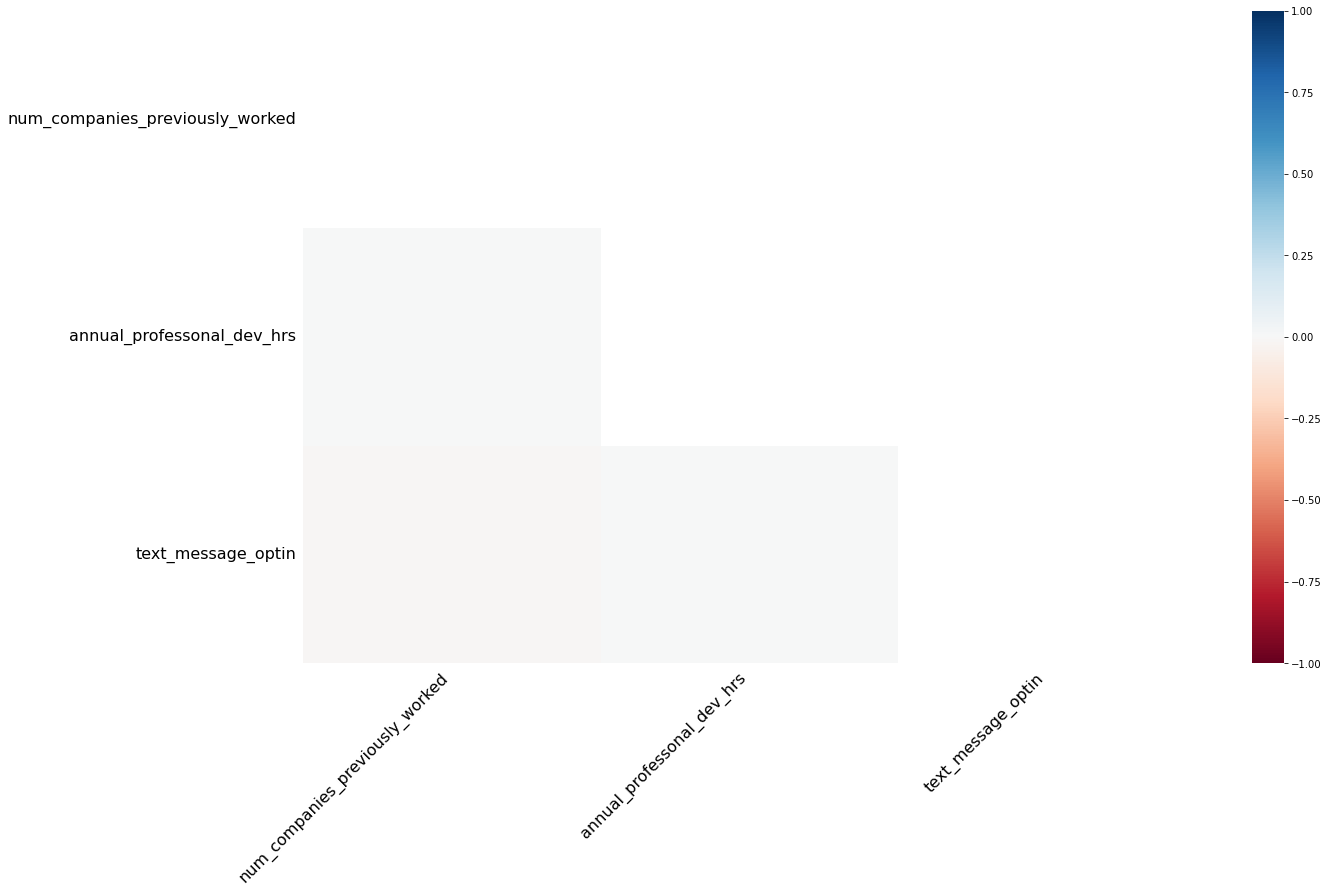

In [35]:
msno.heatmap(emp_to_df)  # missing values appear independently and randomly (columns have no correlation)

<AxesSubplot:>

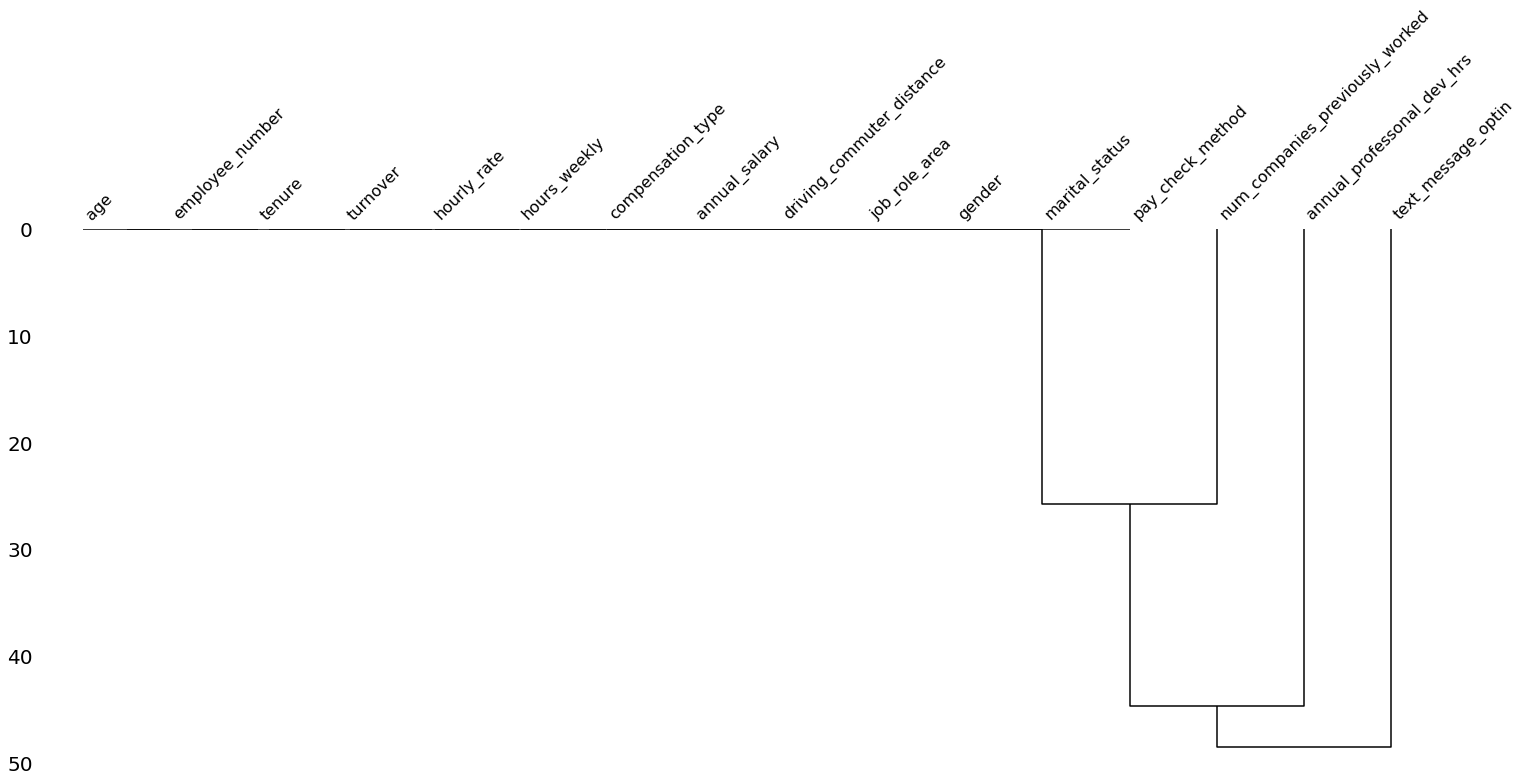

In [36]:
msno.dendrogram(emp_to_df)

# Summary of the Dendrogram:
# the missingness pattern of marital_status and pay_check_method is very similar
# marital_status, pay_check_method, and num_companies_previously_worked form one cluster
# annual_professional_dev_hrs + (marital_status, pay_check_method, num_companies_previously_worked) form another cluster
# text_message_optin + annual_professional_dev_hrs + (marital_status, pay_check_method, num_companies_previously_worked) form another cluster
# the missingness pattern between marital_status, pay_check_method, and num_companies_previously_worked are the most similar, comparing to the other clusters
# the missingness pattern between text_message_optin + annual_professional_dev_hrs + (marital_status, pay_check_method, num_companies_previously_worked) are the least similar, comparing to the other clusters

### Clean each variable before inspecting duplicate entries.

In [37]:
# replace bad formatted values for consistency

columns_to_clean = ['job_role_area', 'pay_check_method']

replacement_map = {
    'job_role_area': {
        'Information Technology': ['InformationTechnology', 'Information_Technology'],
        'Human Resources': ['HumanResources', 'Human_Resources']
    },
    'pay_check_method': {
        'Mailed Check': ['Mail Check', 'Mail_Check', 'MailedCheck'],
        'Direct Deposit': ['DirectDeposit', 'Direct_Deposit']
    }
}

for column in columns_to_clean:
    replacements = replacement_map[column]

    for new_val, old_vals in replacements.items():
        emp_to_df[column].replace(old_vals, value=new_val, inplace=True)

In [38]:
# identify duplicate rows

emp_to_df['is_duplicated'] = emp_to_df.duplicated(keep='first')

emp_to_df[['employee_number', 'is_duplicated']]

,employee_number,is_duplicated
0,1,False
1,2,False
2,3,False
3,4,False
4,5,False
...,...,...
10194,95,True
10195,96,True
10196,97,True
10197,98,True


In [39]:
emp_to_df[emp_to_df['employee_number'] == 99]

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin,is_duplicated
98,99,48,17,Yes,71.33,40,Salary,148075.2,50,Sales,Prefer Not to Answer,Married,8.0,8.0,Mailed Check,Yes,False
10198,99,48,17,Yes,71.33,40,Salary,148075.2,50,Sales,Prefer Not to Answer,Married,8.0,8.0,Mailed Check,Yes,True


#### Inspect for outliers

In [40]:
column_types_df

,dtype,data_subtype
employee_number,int64,nominal
age,int64,continuous
tenure,int64,continuous
turnover,object,nominal
hourly_rate,float64,continuous
hours_weekly,int64,discrete
compensation_type,object,nominal
annual_salary,float64,continuous
driving_commuter_distance,int64,discrete
job_role_area,object,nominal


In [41]:
# define numeric columns (discrete / continuous) which might have outliers

columns = [
    'tenure',
    'hourly_rate', 
    'hours_weekly',
    'annual_salary', 
    'driving_commuter_distance',
    'num_companies_previously_worked',
    'annual_professonal_dev_hrs'
]

Boxplot for tenure


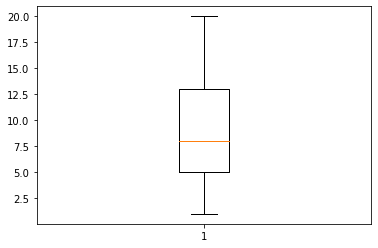

Boxplot for hourly_rate


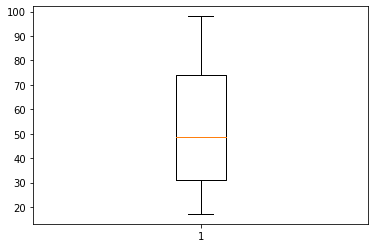

Boxplot for hours_weekly


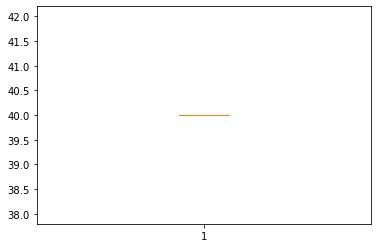

Boxplot for annual_salary


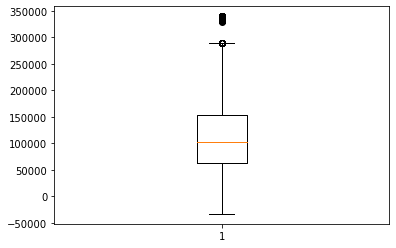

Boxplot for driving_commuter_distance


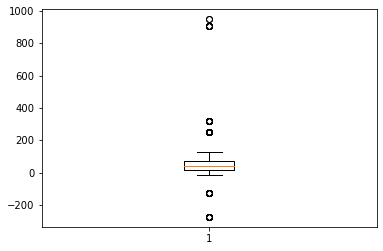

Boxplot for num_companies_previously_worked


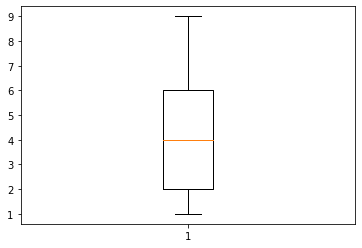

Boxplot for annual_professonal_dev_hrs


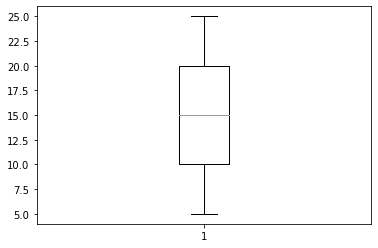

In [42]:
# identify outliers using boxplot

for column in columns:
    if column == 'num_companies_previously_worked' or column == 'annual_professonal_dev_hrs':
        # num_companies_previously_worked and annual_professonal_dev_hrs have nulls
        # nulls need to be dropped before finding outliers
        drop_nan_df = pd.DataFrame()

        drop_nan_df[column] = emp_to_df[column]
        drop_nan_df.dropna(axis=0, subset=column, inplace=True)
        
        plt.boxplot(drop_nan_df[column])
    else:   
        # non-null columns...|
        plt.boxplot(emp_to_df[column])
        
    print(f'Boxplot for {column}')
    plt.show()

In [43]:
# identify outliers using z-scores

zscore_columns = []  # for finding outliers

# find z-score for each column that might have outliers
for column in columns:
    new_column = f'{column}_zscore'
    zscore_columns.append(new_column)
    
    if emp_to_df[column].std() == 0:
        emp_to_df[new_column] = 0
    else:
        emp_to_df[new_column] = zscore(emp_to_df[column], nan_policy='omit')

for zscore_column in zscore_columns:
    orig_col_name = zscore_column.rsplit('_', 1)[0]
    outlier_column = f'is_{orig_col_name}_outlier'
    
    # identify outliers based on the z-score
    is_outlier = (emp_to_df[zscore_column] < -3) | (emp_to_df[zscore_column] > 3)
    emp_to_df[outlier_column] = is_outlier

    # return outliers per the outlier indicator
    outliers = emp_to_df[outlier_column] == True
    
    if len(emp_to_df.loc[outliers]) > 0:
        print(emp_to_df.loc[outliers, zscore_column])


26       16.008192
27       16.008192
34       16.008192
35       16.008192
196      16.748808
           ...    
3491      3.788030
10126    16.008192
10127    16.008192
10134    16.008192
10135    16.008192
Name: driving_commuter_distance_zscore, Length: 245, dtype: float64


##### The distribution in the histogram for annual_salary and driving_commuter_distance is right-skewed; hence, use IQR method to find outliers

<AxesSubplot:xlabel='annual_salary', ylabel='Count'>

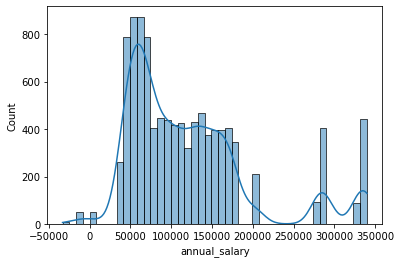

In [44]:
# histogram distribution for annual_salary...right-skewed...

sns.histplot(emp_to_df['annual_salary'], kde=True)

<AxesSubplot:xlabel='driving_commuter_distance', ylabel='Count'>

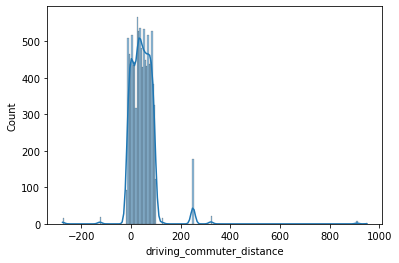

In [45]:
# histogram distribution for driving_commuter_distance...right-skewed...

sns.histplot(emp_to_df['driving_commuter_distance'], kde=True)

In [46]:
# use IQR method to find outliers

outlier_series_list = []

def find_outliers(column):
    Q1 = emp_to_df[column].quantile(0.25)
    Q3 = emp_to_df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = emp_to_df[(emp_to_df[column] < lower_bound) | (emp_to_df[column] > upper_bound)]
    
    return outliers


for column in columns:
    outliers = find_outliers(column)
    
    # output raw data value and its z-score
    output = outliers[[f'{column}', f'{column}_zscore']]
    
    if len(output) > 0:
        print(f'{column}:\n{output}')
        
        outlier_series_list.append(output)

annual_salary:
       annual_salary  annual_salary_zscore
166         331048.0              2.708774
167         331048.0              2.708774
203         337475.2              2.791639
206         338848.0              2.809338
222         330403.2              2.700461
...              ...                   ...
10037       331276.8              2.711724
10038       289966.4              2.179119
10075       332628.8              2.729155
10087       337745.6              2.795125
10094       333544.0              2.740955

[544 rows x 2 columns]
driving_commuter_distance:
       driving_commuter_distance  driving_commuter_distance_zscore
26                           910                         16.008192
27                           910                         16.008192
34                           910                         16.008192
35                           910                         16.008192
196                          950                         16.748808
...             

### Fix data quality issues

#### Handle missing data using imputation techniques

In [47]:
def verify_counts(col_name):
    return emp_to_df[col_name].value_counts(dropna=False)
    
def impute_missingness(col_name, fill_in_value):
    emp_to_df[col_name].fillna(value=fill_in_value, inplace=True)
    
def compute_median(col_name):
    return np.nanmedian(emp_to_df[col_name])
    
def determine_distribution(col_name):
    return sns.histplot(emp_to_df[col_name], kde=True)

##### text_message_optin

In [48]:
# verify counts before imputation
verify_counts('text_message_optin')

Yes    7390
NaN    2266
No      543
Name: text_message_optin, dtype: int64

In [49]:
# since count of 'Yes' > 'No', handle missingness using mode imputation
impute_missingness('text_message_optin', 'Yes')

In [50]:
# verify counts after imputation
verify_counts('text_message_optin')

Yes    9656
No      543
Name: text_message_optin, dtype: int64

###### num_companies_previously_worked

In [51]:
# verify counts before imputation
verify_counts('num_companies_previously_worked')

1.0    1517
2.0    1487
3.0    1464
6.0    1061
4.0    1021
5.0     994
7.0     687
NaN     665
8.0     655
9.0     648
Name: num_companies_previously_worked, dtype: int64

<AxesSubplot:xlabel='num_companies_previously_worked', ylabel='Count'>

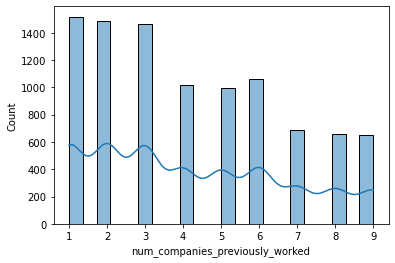

In [52]:
# determine distribution (e.g. normal, skewed)
determine_distribution('num_companies_previously_worked')

In [53]:
# right-skewed, use median to impute missingness

# compute for median
median = compute_median('num_companies_previously_worked')

# impute missingness with the median
impute_missingness('num_companies_previously_worked', median)

# verify after imputation
verify_counts('num_companies_previously_worked')

4.0    1686
1.0    1517
2.0    1487
3.0    1464
6.0    1061
5.0     994
7.0     687
8.0     655
9.0     648
Name: num_companies_previously_worked, dtype: int64

##### annual_professonal_dev_hrs

In [54]:
# verify counts before imputation
verify_counts('annual_professonal_dev_hrs')

NaN     1969
23.0     431
10.0     423
14.0     413
25.0     413
13.0     410
6.0      410
5.0      399
11.0     399
12.0     393
7.0      393
9.0      393
22.0     388
18.0     387
15.0     384
19.0     384
17.0     379
8.0      376
24.0     373
20.0     362
16.0     361
21.0     359
Name: annual_professonal_dev_hrs, dtype: int64

<AxesSubplot:xlabel='annual_professonal_dev_hrs', ylabel='Count'>

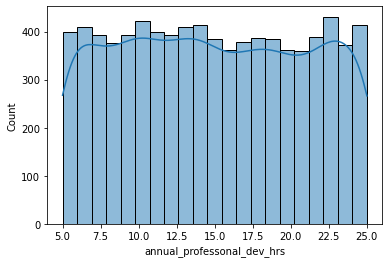

In [55]:
# determine distribution (e.g. normal, skewed)
determine_distribution('annual_professonal_dev_hrs')

In [56]:
# left-skewed, use median to impute missingness

# compute for median
median = compute_median('annual_professonal_dev_hrs')

# impute missingness with the median
impute_missingness('annual_professonal_dev_hrs', median)

# verify after imputation
verify_counts('annual_professonal_dev_hrs')

15.0    2353
23.0     431
10.0     423
14.0     413
25.0     413
13.0     410
6.0      410
5.0      399
11.0     399
12.0     393
7.0      393
9.0      393
22.0     388
18.0     387
19.0     384
17.0     379
8.0      376
24.0     373
20.0     362
16.0     361
21.0     359
Name: annual_professonal_dev_hrs, dtype: int64

#### Cast the data type of each column to an appropriate type

In [57]:
emp_to_df['num_companies_previously_worked'] = emp_to_df['num_companies_previously_worked'].astype('int64')

emp_to_df['num_companies_previously_worked'].dtype

dtype('int64')

In [58]:
emp_to_df['driving_commuter_distance'] = emp_to_df['driving_commuter_distance'].astype('float64')

emp_to_df['driving_commuter_distance'].dtype

dtype('float64')

In [59]:
# verify after casting
emp_to_df.dtypes

employee_number                                 int64
age                                             int64
tenure                                          int64
turnover                                       object
hourly_rate                                   float64
hours_weekly                                    int64
compensation_type                              object
annual_salary                                 float64
driving_commuter_distance                     float64
job_role_area                                  object
gender                                         object
marital_status                                 object
num_companies_previously_worked                 int64
annual_professonal_dev_hrs                    float64
pay_check_method                               object
text_message_optin                             object
is_duplicated                                    bool
tenure_zscore                                 float64
hourly_rate_zscore          

#### Standardize value format / Fix inconsistencies

##### logic already implemented for 'job_role_area' and 'pay_check_method'. see above.

##### Per above (data quality inspection), 'annual_salary' and 'driving_commuter_distance' have negative values.

In [60]:
# annual_salary

emp_to_df[emp_to_df['annual_salary'] <= 0]

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin,is_duplicated,tenure_zscore,hourly_rate_zscore,hours_weekly_zscore,annual_salary_zscore,driving_commuter_distance_zscore,num_companies_previously_worked_zscore,annual_professonal_dev_hrs_zscore,is_tenure_outlier,is_hourly_rate_outlier,is_hours_weekly_outlier,is_annual_salary_outlier,is_driving_commuter_distance_outlier,is_num_companies_previously_worked_outlier,is_annual_professonal_dev_hrs_outlier
54,55,44,16,No,31.30,40,Salary,-15896.0,-5.0,Marketing,Male,Divorced,8,22.0,Mailed Check,Yes,False,1.271338,-0.897757,0,-1.764291,-0.933396,1.525140,1.160084,False,False,False,False,False,False,False
55,56,50,8,No,31.30,40,Salary,-15896.0,-5.0,Marketing,Male,Divorced,5,10.0,Mailed Check,Yes,False,-0.180115,-0.897757,0,-1.764291,-0.933396,0.316371,-0.811316,False,False,False,False,False,False,False
64,65,30,3,Yes,29.49,40,Salary,-28660.8,-8.0,Marketing,Female,Married,1,19.0,Mailed Check,Yes,False,-1.087274,-0.973360,0,-1.928865,-0.988943,-1.295321,0.667234,False,False,False,False,False,False,False
65,66,32,5,Yes,29.49,40,Salary,-28660.8,-8.0,Marketing,Female,Married,3,8.0,Mailed Check,Yes,False,-0.724411,-0.973360,0,-1.928865,-0.988943,-0.489475,-1.139883,False,False,False,False,False,False,False
541,542,37,7,No,31.72,40,Salary,-15022.4,48.0,Marketing,Female,Divorced,2,16.0,Direct Deposit,Yes,False,-0.361547,-0.880214,0,-1.753028,0.047920,-0.892398,0.174384,False,False,False,False,False,False,False
605,606,47,9,No,32.58,40,Salary,-10433.6,125.0,Marketing,Male,Divorced,4,15.0,Direct Deposit,Yes,False,0.001316,-0.844292,0,-1.693866,1.473605,NaN,NaN,False,False,False,False,False,False,False
658,659,30,3,Yes,30.06,40,Salary,-14475.2,46.0,Marketing,Female,Married,2,15.0,Direct Deposit,Yes,False,-1.087274,-0.949552,0,-1.745973,0.010889,-0.892398,NaN,False,False,False,False,False,False,False
863,864,37,7,No,30.99,40,Salary,-16540.8,60.0,Marketing,Male,Divorced,4,15.0,Mailed Check,Yes,False,-0.361547,-0.910706,0,-1.772604,0.270104,-0.086552,NaN,False,False,False,False,False,False,False
1015,1016,40,9,Yes,31.73,40,Salary,-15001.6,-3.0,Marketing,Female,Single,4,15.0,Direct Deposit,No,False,0.001316,-0.879796,0,-1.752760,-0.896366,NaN,NaN,False,False,False,False,False,False,False
1320,1321,36,10,Yes,32.60,40,Salary,-10392.0,87.0,Marketing,Male,Single,4,15.0,Mailed Check,Yes,False,0.182748,-0.843457,0,-1.693329,0.770020,-0.086552,NaN,False,False,False,False,False,False,False


In [61]:
# driving_commuter_distance

emp_to_df[emp_to_df['driving_commuter_distance'] <= 0]

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin,is_duplicated,tenure_zscore,hourly_rate_zscore,hours_weekly_zscore,annual_salary_zscore,driving_commuter_distance_zscore,num_companies_previously_worked_zscore,annual_professonal_dev_hrs_zscore,is_tenure_outlier,is_hourly_rate_outlier,is_hours_weekly_outlier,is_annual_salary_outlier,is_driving_commuter_distance_outlier,is_num_companies_previously_worked_outlier,is_annual_professonal_dev_hrs_outlier
6,7,34,6,No,28.43,40,Salary,59134.4,0.0,Human Resources,Male,Single,2,23.0,Mailed Check,Yes,False,-0.542979,-1.017636,0,-0.796942,-0.840819,-0.892398,1.324367,False,False,False,False,False,False,False
7,8,37,9,Yes,28.43,40,Salary,59134.4,0.0,Human Resources,Male,Single,1,25.0,Mailed Check,Yes,False,0.001316,-1.017636,0,-0.796942,-0.840819,-1.295321,1.652934,False,False,False,False,False,False,False
30,31,30,1,No,24.50,40,Salary,50960.0,-4.0,Human Resources,Female,Divorced,3,17.0,Mailed Check,Yes,False,-1.450137,-1.181792,0,-0.902333,-0.914881,-0.489475,0.338667,False,False,False,False,False,False,False
31,32,34,2,No,24.50,40,Salary,50960.0,-4.0,Human Resources,Female,Divorced,3,15.0,Mailed Check,Yes,False,-1.268706,-1.181792,0,-0.902333,-0.914881,-0.489475,NaN,False,False,False,False,False,False,False
32,33,38,8,No,88.78,40,Salary,284662.4,0.0,Laboratory,Prefer Not to Answer,Divorced,1,21.0,Mailed Check,Yes,False,-0.180115,1.503168,0,2.110736,-0.840819,-1.295321,0.995801,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10155,56,50,8,No,31.30,40,Salary,-15896.0,-5.0,Marketing,Male,Divorced,5,10.0,Mailed Check,Yes,True,-0.180115,-0.897757,0,-1.764291,-0.933396,0.316371,-0.811316,False,False,False,False,False,False,False
10164,65,30,3,Yes,29.49,40,Salary,-28660.8,-8.0,Marketing,Female,Married,1,19.0,Mailed Check,Yes,True,-1.087274,-0.973360,0,-1.928865,-0.988943,-1.295321,0.667234,False,False,False,False,False,False,False
10165,66,32,5,Yes,29.49,40,Salary,-28660.8,-8.0,Marketing,Female,Married,3,8.0,Mailed Check,Yes,True,-0.724411,-0.973360,0,-1.928865,-0.988943,-0.489475,-1.139883,False,False,False,False,False,False,False
10190,91,36,9,No,28.73,40,Salary,59758.4,-7.0,Laboratory,Female,Married,3,11.0,Mailed Check,Yes,True,0.001316,-1.005105,0,-0.788897,-0.970427,-0.489475,-0.647033,False,False,False,False,False,False,False


In [62]:
# To fix negative values for 'annual_salary',
# assuming 4.33 weeks per month, calculate based on this formula:
# (hourly_rate x hours_weekly) x 4.33 x 12

emp_to_df['cal_annual_salary'] = np.where(
    emp_to_df['annual_salary'] > 0,
    emp_to_df['annual_salary'],
    np.round(emp_to_df['hourly_rate'] * emp_to_df['hours_weekly'] * 4.33 * 12, 1)
)

emp_to_df.loc[emp_to_df['annual_salary'] < 0, ['hourly_rate', 'hours_weekly', 'annual_salary', 'cal_annual_salary']]

,hourly_rate,hours_weekly,annual_salary,cal_annual_salary
54,31.30,40,-15896.0,65053.9
55,31.30,40,-15896.0,65053.9
64,29.49,40,-28660.8,61292.0
65,29.49,40,-28660.8,61292.0
541,31.72,40,-15022.4,65926.8
605,32.58,40,-10433.6,67714.3
658,30.06,40,-14475.2,62476.7
863,30.99,40,-16540.8,64409.6
1015,31.73,40,-15001.6,65947.6
1320,32.60,40,-10392.0,67755.8


<AxesSubplot:xlabel='driving_commuter_distance', ylabel='Count'>

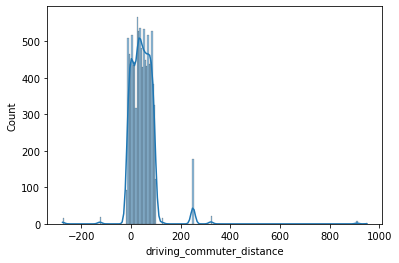

In [63]:
# analyze skewness for 'driving_commuter_distance' to determine the correct imputation technique that can fix 0 and negative values
determine_distribution('driving_commuter_distance')  # right-skewed

In [64]:
# To fix 0 and negative values for 'driving_commuter_distance', impute them with median

# calculate median
median = compute_median('driving_commuter_distance')

emp_to_df['cal_driving_commuter_distance'] = np.where(
    emp_to_df['driving_commuter_distance'] > 0,
    emp_to_df['driving_commuter_distance'],
    median
)

# emp_to_df.loc[emp_to_df['driving_commuter_distance'] > 0, ['driving_commuter_distance', 'cal_driving_commuter_distance']]
emp_to_df.loc[emp_to_df['driving_commuter_distance'] <= 0, ['driving_commuter_distance', 'cal_driving_commuter_distance']]

,driving_commuter_distance,cal_driving_commuter_distance
6,0.0,42.0
7,0.0,42.0
30,-4.0,42.0
31,-4.0,42.0
32,0.0,42.0
...,...,...
10155,-5.0,42.0
10164,-8.0,42.0
10165,-8.0,42.0
10190,-7.0,42.0


#### Drop duplicates

In [65]:
# verify the count of duplicates
emp_to_df[emp_to_df['is_duplicated'] == True]

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin,is_duplicated,tenure_zscore,hourly_rate_zscore,hours_weekly_zscore,annual_salary_zscore,driving_commuter_distance_zscore,num_companies_previously_worked_zscore,annual_professonal_dev_hrs_zscore,is_tenure_outlier,is_hourly_rate_outlier,is_hours_weekly_outlier,is_annual_salary_outlier,is_driving_commuter_distance_outlier,is_num_companies_previously_worked_outlier,is_annual_professonal_dev_hrs_outlier,cal_annual_salary,cal_driving_commuter_distance
10100,1,28,6,Yes,24.37,40,Salary,50689.6,89.0,Research,Female,Married,3,7.0,Mailed Check,Yes,True,-0.542979,-1.187222,0,-0.905819,0.807051,-0.489475,-1.304166,False,False,False,False,False,False,False,50689.6,89.0
10101,2,33,2,Yes,24.37,40,Salary,50689.6,89.0,Research,Female,Married,6,7.0,Mailed Check,Yes,True,-1.268706,-1.187222,0,-0.905819,0.807051,0.719294,-1.304166,False,False,False,False,False,False,False,50689.6,89.0
10102,3,22,1,No,22.52,40,Salary,46841.6,35.0,Information Technology,Female,Single,1,8.0,Mailed Check,Yes,True,-1.450137,-1.264496,0,-0.955430,-0.192781,-1.295321,-1.139883,False,False,False,False,False,False,False,46841.6,35.0
10103,4,23,1,No,22.52,40,Salary,46841.6,35.0,Information Technology,Female,Single,3,15.0,Mailed Check,Yes,True,-1.450137,-1.264496,0,-0.955430,-0.192781,-0.489475,NaN,False,False,False,False,False,False,False,46841.6,35.0
10104,5,40,6,No,88.77,40,Salary,284641.6,12.0,Sales,Prefer Not to Answer,Single,7,15.0,Mailed Check,Yes,True,-0.542979,1.502751,0,2.110468,-0.618635,1.122217,NaN,False,False,False,False,False,False,False,284641.6,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194,95,48,13,Yes,85.40,40,Salary,177632.0,31.0,Research,Male,Single,7,5.0,Mailed Check,Yes,True,0.727043,1.361987,0,0.730819,-0.266842,1.122217,-1.632733,False,False,False,False,False,False,False,177632.0,31.0
10195,96,54,17,No,85.40,40,Salary,177632.0,31.0,Research,Male,Single,2,25.0,Mailed Check,Yes,True,1.452770,1.361987,0,0.730819,-0.266842,-0.892398,1.652934,False,False,False,False,False,False,False,177632.0,31.0
10196,97,44,6,No,71.90,40,Salary,149552.0,32.0,Marketing,Male,Married,6,15.0,Mailed Check,Yes,True,-0.542979,0.798095,0,0.368790,-0.248327,0.719294,NaN,False,False,False,False,False,False,False,149552.0,32.0
10197,98,58,19,No,71.90,40,Salary,149552.0,32.0,Marketing,Male,Married,5,23.0,Mailed Check,Yes,True,1.815634,0.798095,0,0.368790,-0.248327,0.316371,1.324367,False,False,False,False,False,False,False,149552.0,32.0


In [66]:
# drop duplicates
emp_to_df.drop_duplicates(subset=[col for col in emp_to_df.columns if col != 'is_duplicated'], keep='first', inplace=True)

In [67]:
# verify the count of duplicates after dropping duplicates
emp_to_df

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin,is_duplicated,tenure_zscore,hourly_rate_zscore,hours_weekly_zscore,annual_salary_zscore,driving_commuter_distance_zscore,num_companies_previously_worked_zscore,annual_professonal_dev_hrs_zscore,is_tenure_outlier,is_hourly_rate_outlier,is_hours_weekly_outlier,is_annual_salary_outlier,is_driving_commuter_distance_outlier,is_num_companies_previously_worked_outlier,is_annual_professonal_dev_hrs_outlier,cal_annual_salary,cal_driving_commuter_distance
0,1,28,6,Yes,24.37,40,Salary,50689.6,89.0,Research,Female,Married,3,7.0,Mailed Check,Yes,False,-0.542979,-1.187222,0,-0.905819,0.807051,-0.489475,-1.304166,False,False,False,False,False,False,False,50689.6,89.0
1,2,33,2,Yes,24.37,40,Salary,50689.6,89.0,Research,Female,Married,6,7.0,Mailed Check,Yes,False,-1.268706,-1.187222,0,-0.905819,0.807051,0.719294,-1.304166,False,False,False,False,False,False,False,50689.6,89.0
2,3,22,1,No,22.52,40,Salary,46841.6,35.0,Information Technology,Female,Single,1,8.0,Mailed Check,Yes,False,-1.450137,-1.264496,0,-0.955430,-0.192781,-1.295321,-1.139883,False,False,False,False,False,False,False,46841.6,35.0
3,4,23,1,No,22.52,40,Salary,46841.6,35.0,Information Technology,Female,Single,3,15.0,Mailed Check,Yes,False,-1.450137,-1.264496,0,-0.955430,-0.192781,-0.489475,NaN,False,False,False,False,False,False,False,46841.6,35.0
4,5,40,6,No,88.77,40,Salary,284641.6,12.0,Sales,Prefer Not to Answer,Single,7,15.0,Mailed Check,Yes,False,-0.542979,1.502751,0,2.110468,-0.618635,1.122217,NaN,False,False,False,False,False,False,False,284641.6,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,10096,50,15,Yes,61.78,40,Salary,128502.4,6.0,Laboratory,Male,Divorced,1,8.0,Mailed Check,Yes,False,1.089907,0.375385,0,0.097403,-0.729727,-1.295321,-1.139883,False,False,False,False,False,False,False,128502.4,6.0
10096,10097,33,9,Yes,23.28,40,Salary,48422.4,-10.0,Marketing,Male,Single,1,20.0,Direct Deposit,Yes,False,0.001316,-1.232751,0,-0.935050,-1.025973,-1.295321,0.831517,False,False,False,False,False,False,False,48422.4,42.0
10097,10098,31,9,Yes,28.25,40,Salary,37960.0,68.0,Laboratory,Male,Married,2,21.0,Direct Deposit,Yes,False,0.001316,-1.025155,0,-1.069939,0.418228,-0.892398,0.995801,False,False,False,False,False,False,False,37960.0,68.0
10098,10099,50,12,No,32.22,40,Salary,67017.6,-13.0,Research,Female,Married,5,20.0,Direct Deposit,Yes,False,0.545612,-0.859329,0,-0.695306,-1.081520,0.316371,0.831517,False,False,False,False,False,False,False,67017.6,42.0


#### Fix outliers

##### Assuming the company needs to perform regression to offer higher salaries based on other factors like work experience and educational level in order to retain its employees, use capping to fix the outliers for annual_salary.

<AxesSubplot:xlabel='cal_annual_salary', ylabel='Count'>

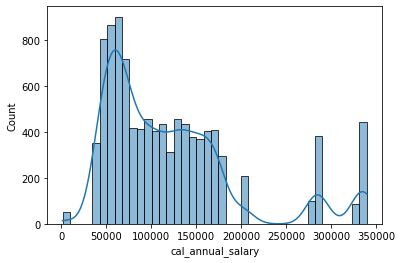

In [68]:
# Re-determine skewness of annual_salary after fixing invalid values (ensure IQR method is suitable to find outliers)

sns.histplot(emp_to_df['cal_annual_salary'], kde=True)  # right-skewed; hence, IQR method is suitable

In [69]:
# Re-identify outliers for cal_annual_salary

annual_salary_outliers_df = find_outliers('cal_annual_salary')

annual_salary_outliers_df

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin,is_duplicated,tenure_zscore,hourly_rate_zscore,hours_weekly_zscore,annual_salary_zscore,driving_commuter_distance_zscore,num_companies_previously_worked_zscore,annual_professonal_dev_hrs_zscore,is_tenure_outlier,is_hourly_rate_outlier,is_hours_weekly_outlier,is_annual_salary_outlier,is_driving_commuter_distance_outlier,is_num_companies_previously_worked_outlier,is_annual_professonal_dev_hrs_outlier,cal_annual_salary,cal_driving_commuter_distance
166,167,41,3,No,91.85,40,Salary,331048.0,-5.0,Sales,Female,Married,6,25.0,Mailed Check,Yes,False,-1.087274,1.631402,0,2.708774,-0.933396,0.719294,1.652934,False,False,False,False,False,False,False,331048.0,42.0
167,168,58,16,No,91.85,40,Salary,331048.0,-5.0,Sales,Female,Married,2,15.0,Mailed Check,Yes,False,1.271338,1.631402,0,2.708774,-0.933396,-0.892398,NaN,False,False,False,False,False,False,False,331048.0,42.0
203,204,41,2,No,94.94,40,Salary,337475.2,15.0,Human Resources,Female,Single,6,16.0,Direct Deposit,Yes,False,-1.268706,1.760470,0,2.791639,-0.563088,0.719294,0.174384,False,False,False,False,False,False,False,337475.2,15.0
206,207,49,7,No,95.60,40,Salary,338848.0,-12.0,Research,Male,Married,2,15.0,Mailed Check,Yes,False,-0.361547,1.788038,0,2.809338,-1.063004,-0.892398,NaN,False,False,False,False,False,False,False,338848.0,42.0
222,223,54,11,No,91.54,40,Salary,330403.2,52.0,Sales,Male,Single,1,9.0,Mailed Check,No,False,0.364180,1.618453,0,2.700461,0.121981,-1.295321,-0.975599,False,False,False,False,False,False,False,330403.2,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10037,10038,56,16,Yes,91.96,40,Salary,331276.8,38.0,Research,Prefer Not to Answer,Married,4,5.0,Mailed Check,Yes,False,1.271338,1.635996,0,2.711724,-0.137234,NaN,-1.632733,False,False,False,False,False,False,False,331276.8,38.0
10038,10039,48,20,Yes,91.33,40,Salary,289966.4,12.0,Research,Male,Married,9,12.0,Mailed Check,Yes,False,1.997065,1.609681,0,2.179119,-0.618635,1.928063,-0.482749,False,False,False,False,False,False,False,289966.4,12.0
10075,10076,44,13,No,92.61,40,Salary,332628.8,48.0,Healthcare,Female,Divorced,5,21.0,Mailed Check,Yes,False,0.727043,1.663147,0,2.729155,0.047920,0.316371,0.995801,False,False,False,False,False,False,False,332628.8,48.0
10087,10088,47,17,Yes,95.07,40,Salary,337745.6,23.0,Sales,Female,Single,5,9.0,Mailed Check,Yes,False,1.452770,1.765900,0,2.795125,-0.414965,0.316371,-0.975599,False,False,False,False,False,False,False,337745.6,23.0


In [70]:
# among the outliers, verify the max annual salary before capping
annual_salary_outliers_df['cal_annual_salary'].max()

339950.4

In [71]:
# determine upper cap limit
upper_threshold = annual_salary_outliers_df['cal_annual_salary'].quantile(0.95)

upper_threshold

339160.0

In [72]:
# replace any value above the upper cap limit
annual_salary_outliers_df['cal_annual_salary'] = annual_salary_outliers_df['cal_annual_salary'].clip(upper=upper_threshold)

# verify the max annual_salary after capping
annual_salary_outliers_df['cal_annual_salary'].max()

/var/folders/l8/gp4gbbbn6rv1zlv5l0kynx1m0000gn/T/ipykernel_29194/2640193189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annual_salary_outliers_df['cal_annual_salary'] = annual_salary_outliers_df['cal_annual_salary'].clip(upper=upper_threshold)


339160.0

In [73]:
# update the original dataframe with the capping result
emp_to_df.loc[annual_salary_outliers_df.index, 'cal_annual_salary'] = annual_salary_outliers_df['cal_annual_salary']

# verify the max annual_salary of the original dataframe after capping
emp_to_df['cal_annual_salary'].max()

339160.0

##### Assuming the company needs to understand the relationship between commute distance and other variables such as salary and turnover rate, use binning for driving_commuter_distance to support dashboard creation.

In [74]:
# start binning...
emp_to_df['commute_distance_category'] = pd.cut(emp_to_df['cal_driving_commuter_distance'], bins=10)

emp_to_df

,employee_number,age,tenure,turnover,hourly_rate,hours_weekly,compensation_type,annual_salary,driving_commuter_distance,job_role_area,gender,marital_status,num_companies_previously_worked,annual_professonal_dev_hrs,pay_check_method,text_message_optin,is_duplicated,tenure_zscore,hourly_rate_zscore,hours_weekly_zscore,annual_salary_zscore,driving_commuter_distance_zscore,num_companies_previously_worked_zscore,annual_professonal_dev_hrs_zscore,is_tenure_outlier,is_hourly_rate_outlier,is_hours_weekly_outlier,is_annual_salary_outlier,is_driving_commuter_distance_outlier,is_num_companies_previously_worked_outlier,is_annual_professonal_dev_hrs_outlier,cal_annual_salary,cal_driving_commuter_distance,commute_distance_category
0,1,28,6,Yes,24.37,40,Salary,50689.6,89.0,Research,Female,Married,3,7.0,Mailed Check,Yes,False,-0.542979,-1.187222,0,-0.905819,0.807051,-0.489475,-1.304166,False,False,False,False,False,False,False,50689.6,89.0,"(0.051, 95.9]"
1,2,33,2,Yes,24.37,40,Salary,50689.6,89.0,Research,Female,Married,6,7.0,Mailed Check,Yes,False,-1.268706,-1.187222,0,-0.905819,0.807051,0.719294,-1.304166,False,False,False,False,False,False,False,50689.6,89.0,"(0.051, 95.9]"
2,3,22,1,No,22.52,40,Salary,46841.6,35.0,Information Technology,Female,Single,1,8.0,Mailed Check,Yes,False,-1.450137,-1.264496,0,-0.955430,-0.192781,-1.295321,-1.139883,False,False,False,False,False,False,False,46841.6,35.0,"(0.051, 95.9]"
3,4,23,1,No,22.52,40,Salary,46841.6,35.0,Information Technology,Female,Single,3,15.0,Mailed Check,Yes,False,-1.450137,-1.264496,0,-0.955430,-0.192781,-0.489475,NaN,False,False,False,False,False,False,False,46841.6,35.0,"(0.051, 95.9]"
4,5,40,6,No,88.77,40,Salary,284641.6,12.0,Sales,Prefer Not to Answer,Single,7,15.0,Mailed Check,Yes,False,-0.542979,1.502751,0,2.110468,-0.618635,1.122217,NaN,False,False,False,False,False,False,False,284641.6,12.0,"(0.051, 95.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,10096,50,15,Yes,61.78,40,Salary,128502.4,6.0,Laboratory,Male,Divorced,1,8.0,Mailed Check,Yes,False,1.089907,0.375385,0,0.097403,-0.729727,-1.295321,-1.139883,False,False,False,False,False,False,False,128502.4,6.0,"(0.051, 95.9]"
10096,10097,33,9,Yes,23.28,40,Salary,48422.4,-10.0,Marketing,Male,Single,1,20.0,Direct Deposit,Yes,False,0.001316,-1.232751,0,-0.935050,-1.025973,-1.295321,0.831517,False,False,False,False,False,False,False,48422.4,42.0,"(0.051, 95.9]"
10097,10098,31,9,Yes,28.25,40,Salary,37960.0,68.0,Laboratory,Male,Married,2,21.0,Direct Deposit,Yes,False,0.001316,-1.025155,0,-1.069939,0.418228,-0.892398,0.995801,False,False,False,False,False,False,False,37960.0,68.0,"(0.051, 95.9]"
10098,10099,50,12,No,32.22,40,Salary,67017.6,-13.0,Research,Female,Married,5,20.0,Direct Deposit,Yes,False,0.545612,-0.859329,0,-0.695306,-1.081520,0.316371,0.831517,False,False,False,False,False,False,False,67017.6,42.0,"(0.051, 95.9]"


### Save final output as .csv

In [75]:
# drop unnecessary columns

emp_to_df = emp_to_df.drop(columns=[col for col in emp_to_df.columns if col.endswith('_zscore')
                                         or col.endswith('_outlier')
                                         or col in ('is_duplicated', 'driving_commuter_distance', 'annual_salary')])

In [76]:
# rename columns

emp_to_df.rename(columns={'cal_annual_salary': 'annual_salary', 'cal_driving_commuter_distance': 'driving_commuter_distance'}, inplace=True)

In [78]:
emp_to_df.to_csv('../output/employer_turnover.csv', index=False)